In [435]:
%matplotlib notebook
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('training_data.csv', sep=",")
data.head()

,Month #,White Player #,Black Player #,Score
0,1,73,1246,0.5
1,1,73,5097,0.5
2,1,73,5104,0.5
3,1,73,7321,1.0
4,1,73,7375,0.5


In [436]:
outcomes=data['Score'].unique() 
print(outcomes)

[0.5 1.  0. ]


### The score is either 1 which represents a white win, 0.5 which denotes a tie or 0 which represents a black win.

### Genral data exploration 

In [437]:

no_white_players = data['White Player #'].nunique() 
unique_white_players = set(data['White Player #'].unique())

no_black_players = data['Black Player #'].nunique() 
unique_black_players = set(data['Black Player #'].unique())

played_only_white = unique_white_players - unique_black_players
played_only_black = unique_black_players - unique_white_players

print("Number of matches in training dataset: {}".format(len(data)))
print("Number of players who have only played white: {}".format(len(played_only_white)))
print("Number of players who have only played black: {}".format(len(played_only_black)))
print("Total unique players {}".format(len(unique_white_players.union(unique_black_players))))

Number of matches in training dataset: 65053
Number of players who have only played white: 719
Number of players who have only played black: 695
Total unique players 7301


### Benefits due to starting color :

<IPython.core.display.Javascript object>


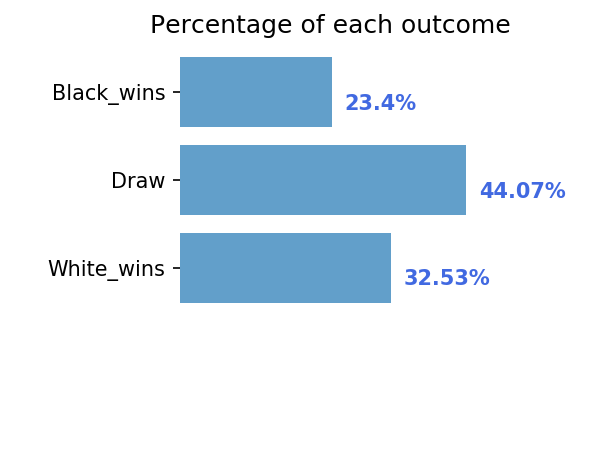

In [438]:
fig, ax = plt.subplots(figsize=(4,3))
plt.subplots_adjust(left=0.3, right=0.8, top=0.9, bottom=0.3)

score_labels = ('Black_wins','Draw','White_wins')
y_pos = np.arange(len(score_labels))
value=data.groupby('Score').count()
value=value/len(data)*100

ax.barh(y_pos, value["Month #"], align='center',alpha=0.7)
plt.xticks([])
ax.set_yticks(y_pos)
ax.set_yticklabels(score_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title('Percentage of each outcome')

for i, v in enumerate(value["Month #"]):
    ax.text(v + 2, i + .2, str(round(v,2))+'%', color='royalblue', fontweight='bold')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.show()


### The percentage of white wins are more than that of black. As the white player always has the first move in chess, the white player has an advantage.

### Checking if repetition of winners/ patters in winners when same pair competes:

In [492]:
data['first']=0*len(data)
data['second']=0*len(data)
data[['first', 'second']] = np.sort(data[['White Player #', 'Black Player #']], axis=1)
pair_count=data.groupby(["first", "second"]).size()
orderd_pair_count=data.groupby(["White Player #", "Black Player #"]).size()
morethan1game_pairs=pair_count[pair_count>1]
ordered_morethan1game_pairs=orderd_pair_count[orderd_pair_count>1]
print("{} pairs of players played more than once against each other to a combined total of {} games".format(len(morethan1game_pairs),sum(morethan1game_pairs)))


6497 pairs of players played more than once against each other to a combined total of 15651 games


In [449]:
morethan1game_pairs=morethan1game_pairs.reset_index(level=['first', 'second'])
ordered_morethan1game_pairs=ordered_morethan1game_pairs.reset_index(level=['White Player #', 'Black Player #'])

In [485]:

def function1(x,label1,label2):
    l=x[label1]
    m=x[label2]
    n=x[0]
    K=data.loc[(data[label1]==l) & (data[label2]==m)]
    count=-1
    for i in K.itertuples():
        d=i.Score
        break
    for i in K.itertuples():
        if(i.Score==d):
            count=count+1
        else:
            d=i.Score
    return count

def function2(x,label1,label2):
    l=x[label1]
    m=x[label2]
    n=x[0]
    K=data.loc[(data[label1]==l) & (data[label2]==m)]
    count1=-1
    L=[]
    for i in K.itertuples():
        L.append(i.Score)
        break
    for i in K.itertuples():
        if(i.Score in L):
            count1=count1+1
        else:
            L.append(i.Score)
    return count1

In [486]:

morethan1game_pairs['new']=morethan1game_pairs.apply(lambda row: function1(row,'first','second'), axis=1)
morethan1game_pairs['new1']=morethan1game_pairs.apply(lambda row: function2(row,'first','second'), axis=1)
ordered_morethan1game_pairs['new']=ordered_morethan1game_pairs.apply(lambda row: function1(row,'White Player #', 'Black Player #'), axis=1)
ordered_morethan1game_pairs['new1']=ordered_morethan1game_pairs.apply(lambda row: function2(row,'White Player #', 'Black Player #'), axis=1)

In [487]:
ordered_morethan1game_pairs.head()

,White Player #,Black Player #,0,new,new1
0,4,2084,2,1,1
1,4,3544,2,0,0
2,10,4506,2,0,0
3,10,4971,2,1,1
4,51,6582,2,1,1


In [490]:
outcome=sum(morethan1game_pairs['new']/(sum(morethan1game_pairs[0])-len(morethan1game_pairs)))*100
outcome1=sum(morethan1game_pairs['new1']/(sum(morethan1game_pairs[0])-len(morethan1game_pairs)))*100
print(outcome,outcome1)
outcome=sum(ordered_morethan1game_pairs['new']/(sum(ordered_morethan1game_pairs[0])-len(ordered_morethan1game_pairs)))*100
outcome1=sum(ordered_morethan1game_pairs['new1']/(sum(ordered_morethan1game_pairs[0])-len(ordered_morethan1game_pairs)))*100
print(outcome,outcome1)

43.019445051341656 50.34957395673787
47.47353704813045 51.96724585579978
